STATISTIKA DESKRIPTIF

MUJTAHIDA AZMI FITRI

23083010036

PRAKTIKUM EKSPLORASI DATA ANALISIS

**DESKRIPSI DATASET**

Dataset yang digunakan merupakan data transaksi jual-beli rumah di wilayah Seattle, yang mencakup berbagai informasi tentang spesifikasi properti seperti jumlah kamar tidur, luas bangunan, jumlah lantai, kondisi rumah, dan informasi lainnya. Tujuan dari analisis ini adalah untuk meng-analisis distribusi harga rumah.

Alasan memilih dataset ini adalah karena banyaknya variasi fitur yang tersedia untuk setiap properti, seperti ukuran rumah, kondisi bangunan, dan lokasi properti, yang diyakini memiliki dampak signifikan terhadap harga jual rumah. Informasi ini sangat relevan bagi pengembang properti, pembeli rumah, dan investor yang ingin memahami tren harga dan faktor-faktor yang mempengaruhi nilai properti di wilayah Seattle.

Variabel-variabel yang diamati dalam data ini meliputi:

1. bedrooms - Jumlah kamar tidur.

2. bathrooms - Jumlah kamar mandi.

3. sqft_living/luas area hunian - Luas area bangunan dalam satuan sqft.

4. waterfront - Properti berada di tepi laut (ya/tidak).

5. floors - Jumlah lantai dalam properti.

6. price - Harga jual properti (target).

7. condition - Kondisi umum rumah, dinilai dari 1 hingga 5.

8. grade - Kualitas konstruksi dan desain rumah, dengan skor dari 1 (terendah) hingga 13 (tertinggi).

**import library**

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**menampilkan data**

In [13]:
file_path = '/content/drive/MyDrive/Colab Notebooks/kc_house_data_finish.csv'
df = pd.read_csv(file_path)

print(df.head())

    price  bedrooms  bathrooms  sqft_living  floors  waterfront  condition  \
0  221900         3       1.00         1180     1.0           0          3   
1  538000         3       2.25         2570     2.0           0          3   
2  180000         2       1.00          770     1.0           0          3   
3  604000         4       3.00         1960     1.0           0          5   
4  510000         3       2.00         1680     1.0           0          3   

   grade  
0      7  
1      7  
2      6  
3      7  
4      8  


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   waterfront   21613 non-null  int64  
 6   condition    21613 non-null  int64  
 7   grade        21613 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB


**visualisasi data**

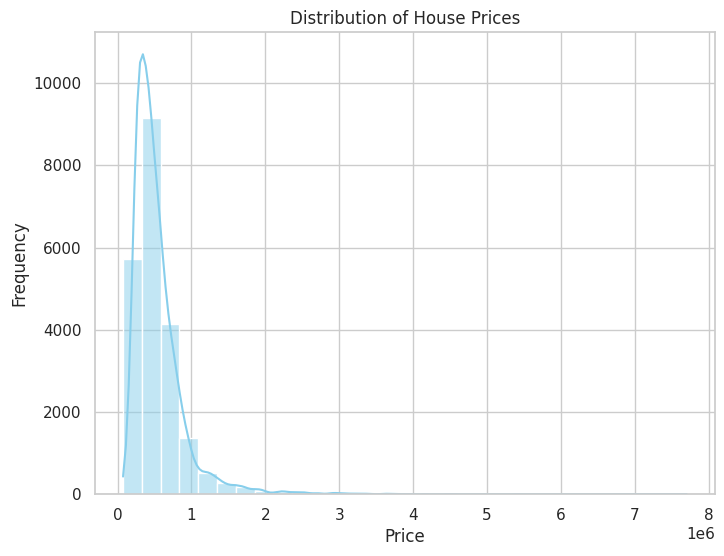

In [16]:
sns.set(style="whitegrid")

# Histogram of house prices (price)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Jenis Distribusi: Right-Skewed (miring ke kanan).

Histogram menunjukkan bahwa sebagian besar harga rumah berada pada kisaran rendah hingga menengah, dengan sejumlah kecil rumah yang memiliki harga sangat tinggi (outlier) di ujung kanan.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


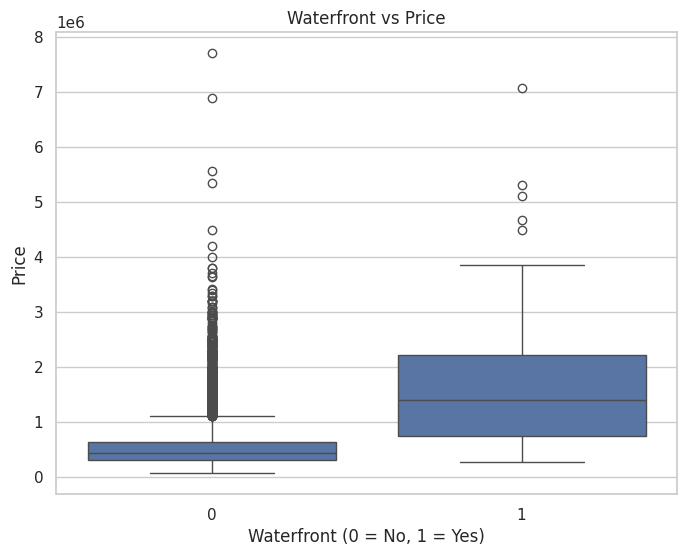

In [17]:
# Boxplot for Waterfront vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Waterfront vs Price')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

Jenis Distribusi: Dua kategori terpisah.

Boxplot ini menunjukkan perbedaan harga yang signifikan antara rumah di pinggir air (waterfront = 1) dan yang tidak (waterfront = 0). Rumah di pinggir air memiliki harga yang jauh lebih tinggi. Ini menunjukkan bahwa lokasi yang dekat air sangat mempengaruhi harga rumah.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


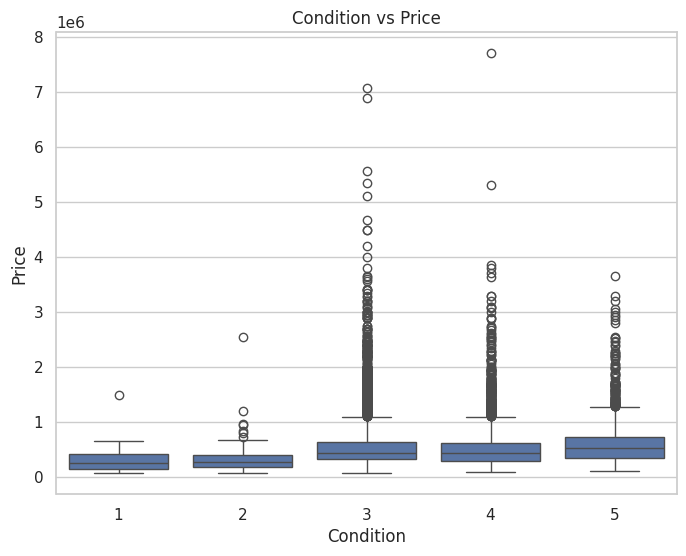

In [18]:
# Boxplot for Condition vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Condition vs Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

Jenis Distribusi: unimodal.

Boxplot menunjukkan bagaimana kondisi rumah mempengaruhi harga. Dari kondisi 1 hingga 5, harga rumah menunjukkan pola yang jelas meningkat. Setiap tingkat kondisi memiliki rentang harga yang lebih tinggi dibandingkan dengan tingkat di bawahnya. Ini menunjukkan tren yang konsisten tanpa adanya dua puncak yang terpisah.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


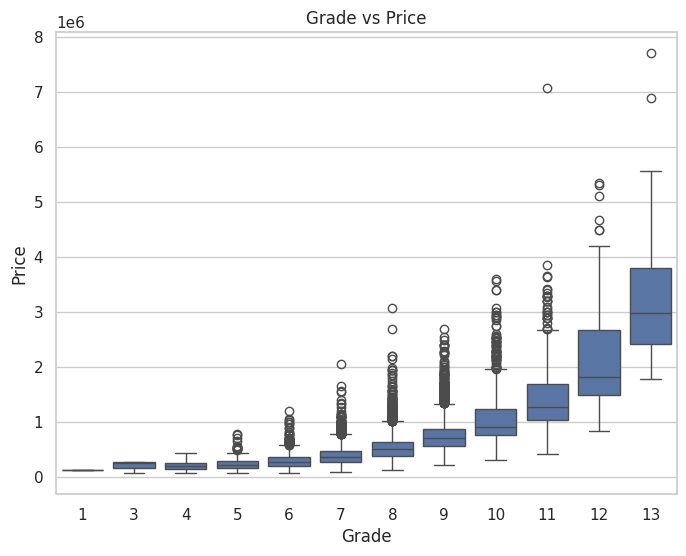

In [19]:
# Boxplot for Grade vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('Grade vs Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

Jenis Distribusi: Right-Skewed (miring ke kanan).

Boxplot menunjukkan bahwa kualitas bangunan (grade) memiliki hubungan langsung dengan harga rumah. Dengan meningkatnya grade, harga rumah juga meningkat. Namun, pada setiap tingkatan grade, terutama untuk grade yang lebih tinggi, masih terdapat beberapa rumah dengan harga yang jauh lebih tinggi, menciptakan distribusi yang miring ke kanan.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


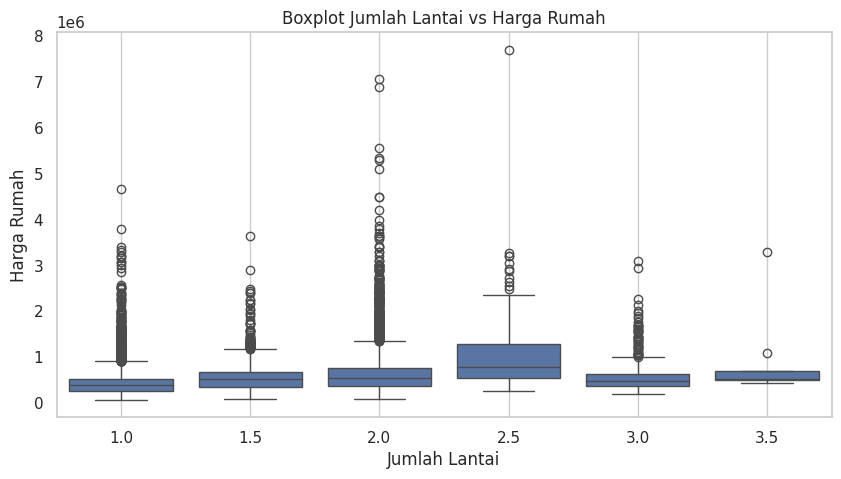

In [24]:
# Boxplot Jumlah Lantai vs Harga Rumah
plt.figure(figsize=(10, 5))
sns.boxplot(x='floors', y='price', data=df)
plt.title('Boxplot Jumlah Lantai vs Harga Rumah')
plt.xlabel('Jumlah Lantai')
plt.ylabel('Harga Rumah')
plt.grid()
plt.show()

Jenis Distribusi: Dua Kategori Terpisah.

Boxplot menunjukkan bahwa terdapat perbedaan yang signifikan antara harga rumah berdasarkan jumlah lantai. Rumah yang memiliki lebih dari satu lantai (1.5 dan 2 lantai) cenderung memiliki harga yang lebih tinggi dibandingkan dengan rumah satu lantai. Ini menunjukkan bahwa jumlah lantai merupakan faktor yang berpengaruh pada harga rumah. Adanya outlier di kategori rumah satu lantai juga terlihat, tetapi secara umum, rumah bertingkat memiliki rentang harga yang lebih tinggi.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


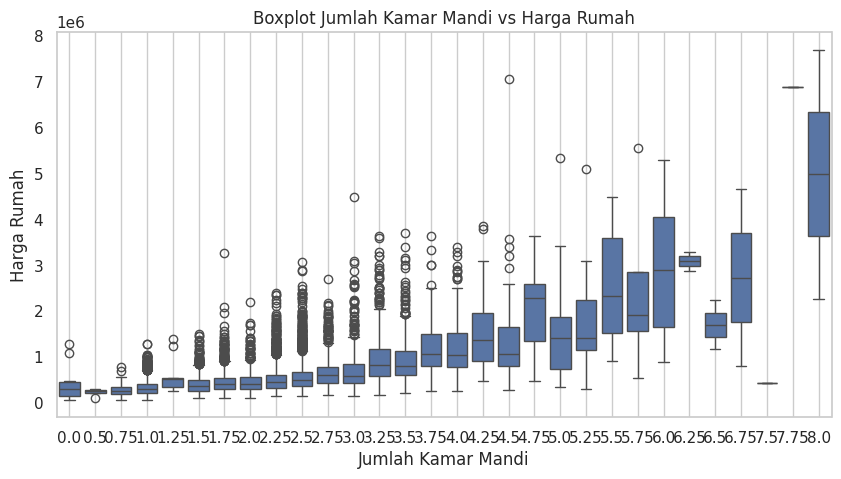

In [26]:
# Boxplot Jumlah Kamar Mandi vs Harga Rumah
plt.figure(figsize=(10, 5))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Boxplot Jumlah Kamar Mandi vs Harga Rumah')
plt.xlabel('Jumlah Kamar Mandi')
plt.ylabel('Harga Rumah')
plt.grid()
plt.show()

jenis distribusi: miring ke kanan (right-skewed).

Visualisasi ini menunjukan bahwa rumah dengan jumlah kamar mandi yang lebih banyak cenderung memiliki harga yang lebih tinggi, dengan median harga yang meningkat seiring bertambahnya jumlah kamar mandi. Meskipun demikian, terdapat beberapa outlier di kategori rumah dengan jumlah kamar mandi yang sedikit, yang menunjukkan bahwa meskipun jumlah kamar mandi dapat memengaruhi harga, faktor lain juga berperan dalam menentukan harga jual.

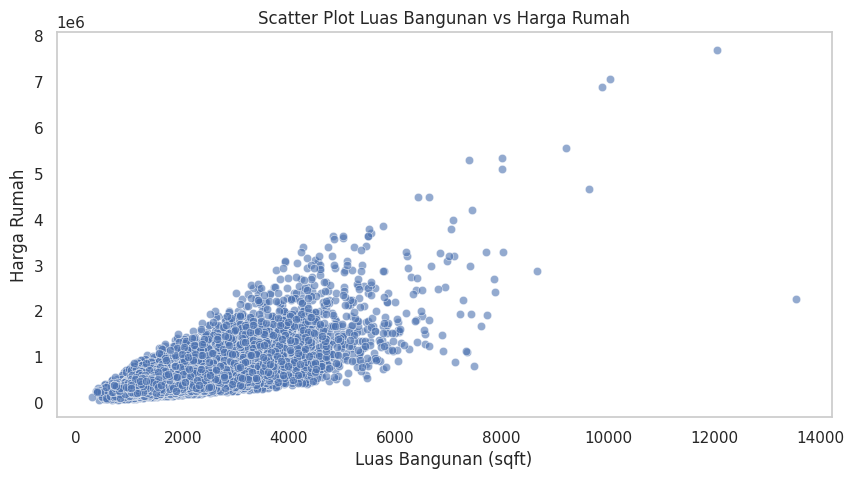

In [27]:
# Scatter Plot Luas Bangunan vs Harga Rumah
plt.figure(figsize=(10, 5))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title('Scatter Plot Luas Bangunan vs Harga Rumah')
plt.xlabel('Luas Bangunan (sqft)')
plt.ylabel('Harga Rumah')
plt.grid()
plt.show()

jenis distribusi: Right-Skewed (Miring ke Kanan).

rumah yang lebih besar cenderung memiliki harga lebih tinggi. Meskipun ada beberapa outlier, terutama rumah dengan luas besar yang memiliki harga jauh di atas median, ini menunjukkan bahwa luas bangunan berpengaruh terhadap harga, tetapi faktor lain dan fitur tambahan juga memainkan peran penting. mengingat adanya outlier di sisi kanan yang menunjukkan harga tinggi untuk beberapa rumah yang memiliki luas bangunan sangat besar.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


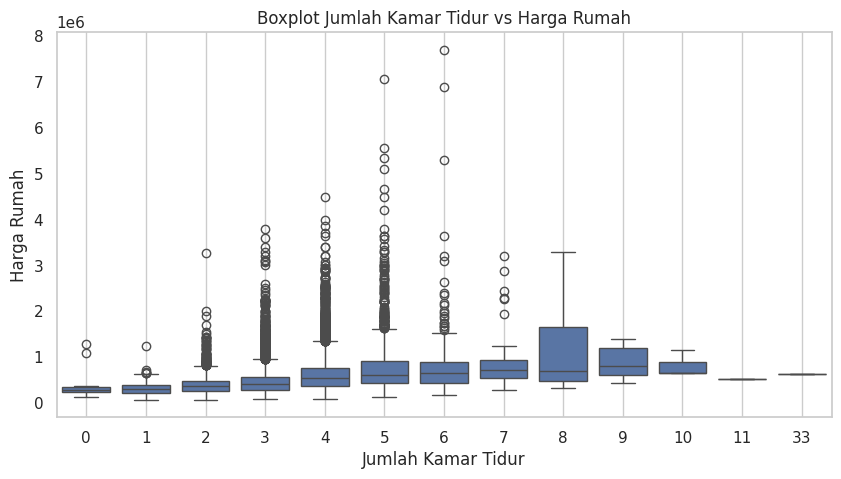

In [29]:
# Boxplot Jumlah Kamar Tidur vs Harga Rumah
plt.figure(figsize=(10, 5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Boxplot Jumlah Kamar Tidur vs Harga Rumah')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga Rumah')
plt.grid()
plt.show()

jenis distribusi: Right-Skewed (Miring ke Kanan)

Boxplot ini menunjukkan bahwa rumah dengan lebih banyak kamar tidur cenderung memiliki harga yang lebih tinggi. Namun, ada pola yang lebih kompleks, di mana jumlah kamar tidur yang terlalu banyak (misalnya, lebih dari 6) tampak memiliki harga yang bervariasi dan bisa menghasilkan outlier. Ini menunjukkan bahwa, meskipun jumlah kamar tidur berpengaruh terhadap harga, faktor lain juga berperan dalam menentukan harga jual rumah.


**pemusatan data**

In [1]:
import pandas as pd

# Membaca dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/kc_house_data_finish.csv'
df = pd.read_csv(file_path)

# Fungsi untuk menghitung mean, median, dan modus
def central_tendency(variable_name):
    mean_value = df[variable_name].mean()
    median_value = df[variable_name].median()
    mode_value = df[variable_name].mode()[0]  # Mengambil nilai modus
    return mean_value, median_value, mode_value

# Variabel yang ingin dianalisis
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'floors', 'price', 'condition', 'grade']

# Menyimpan hasil pemusatan data
central_tendency_results = {}

for var in variables:
    mean, median, mode = central_tendency(var)
    central_tendency_results[var] = {'Mean': mean, 'Median': median, 'Mode': mode}

# Menampilkan hasil
results_df = pd.DataFrame(central_tendency_results).T
print(results_df)

                      Mean     Median      Mode
bedrooms          3.370842       3.00       3.0
bathrooms         2.114757       2.25       2.5
sqft_living    2079.899736    1910.00    1300.0
waterfront        0.007542       0.00       0.0
floors            1.494309       1.50       1.0
price        540088.141767  450000.00  350000.0
condition         3.409430       3.00       3.0
grade             7.656873       7.00       7.0



**Bedrooms**: Rata-rata jumlah kamar tidur adalah sekitar 3.37, dengan median di angka 3, menunjukkan bahwa sebagian besar rumah memiliki 3 kamar tidur. Modus adalah 3, yang berarti jumlah kamar tidur paling umum di antara rumah adalah 3.

**Bathrooms**: Rata-rata jumlah kamar mandi adalah sekitar 2.11, sementara median berada di 2.25, menunjukkan bahwa mayoritas rumah memiliki 2 hingga 3 kamar mandi. Modus 2.5 menunjukkan bahwa banyak rumah memiliki 2 kamar mandi, dengan beberapa di antaranya memiliki tambahan setengah kamar mandi.

**Sqft Living**: Rata-rata luas bangunan adalah sekitar 2079.90 sqft, dengan median di angka 1910 sqft. Hal ini menunjukkan bahwa sebagian besar rumah memiliki luas di bawah rata-rata tersebut, namun beberapa rumah yang lebih besar dapat menarik rata-rata ke atas. Modusnya adalah 1300 sqft, menunjukkan bahwa ada banyak rumah dengan ukuran sekitar 1300 sqft.

**Waterfront**: Rata-rata dari variabel waterfront adalah 0.0075, dengan median di angka 0 dan modus juga di 0. Hal ini menunjukkan bahwa sebagian besar rumah tidak berada di tepi air. Karena nilai modus dan median sama-sama 0, kita dapat menyimpulkan bahwa rumah di tepi air sangat jarang ditemukan dalam dataset ini.

**Floors**: Rata-rata jumlah lantai adalah sekitar 1.49, dengan median 1.50. Ini menunjukkan bahwa sebagian besar rumah adalah bangunan satu lantai, namun ada beberapa yang memiliki dua lantai. Modus di 1.0 menunjukkan bahwa banyak rumah hanya memiliki satu lantai.

**Price:** Rata-rata harga rumah adalah sekitar $540,088, dengan median di angka $450,000. Ini menunjukkan bahwa ada variasi besar dalam harga rumah, dengan beberapa rumah yang sangat mahal menarik rata-rata ke atas. Modus harga rumah adalah $350,000, yang menunjukkan bahwa banyak rumah dijual di kisaran harga tersebut. Median yang lebih rendah dari rata-rata menunjukkan bahwa distribusi harga rumah sedikit miring ke kanan, artinya ada beberapa rumah yang sangat mahal.

**Condition**: Rata-rata kondisi rumah adalah 3.41, dengan median di angka 3. Hal ini menunjukkan bahwa sebagian besar rumah berada dalam kondisi baik. Modus 3 juga mengindikasikan bahwa kondisi tersebut adalah yang paling umum.

**Grade**: Rata-rata grade rumah adalah 7.66, dengan median di angka 7. Ini menunjukkan bahwa banyak rumah memiliki kualitas yang baik, namun beberapa rumah dengan kualitas sangat baik menarik rata-rata lebih tinggi. Modus 7 menunjukkan bahwa grade ini adalah yang paling umum di antara rumah-rumah yang dianalisis.


**penyebaran data**

In [2]:
# Menghitung rentang, varians, dan deviasi standar
def data_dispersion(variable_name):
    range_value = df[variable_name].max() - df[variable_name].min()
    variance_value = df[variable_name].var()
    std_dev_value = df[variable_name].std()
    return range_value, variance_value, std_dev_value

dispersion_results = {}

for var in variables:
    data_range, variance, std_dev = data_dispersion(var)
    dispersion_results[var] = {
        'Range': data_range,
        'Variance': variance,
        'Standard Deviation': std_dev
    }

# Menampilkan hasil
dispersion_df = pd.DataFrame(dispersion_results).T
print(dispersion_df)

                 Range      Variance  Standard Deviation
bedrooms          33.0  8.650150e-01            0.930062
bathrooms          8.0  5.931513e-01            0.770163
sqft_living    13250.0  8.435337e+05          918.440897
waterfront         1.0  7.485226e-03            0.086517
floors             2.5  2.915880e-01            0.539989
price        7625000.0  1.347824e+11       367127.196483
condition          4.0  4.234665e-01            0.650743
grade             12.0  1.381703e+00            1.175459


**Bedrooms**: Rentang jumlah kamar tidur adalah 33, menunjukkan bahwa ada variasi yang cukup besar dalam jumlah kamar tidur antar rumah. Varians sebesar 0.865 dan deviasi standar 0.930 menunjukkan bahwa meskipun ada variasi, sebagian besar rumah memiliki jumlah kamar tidur yang relatif serupa, dengan sedikit perbedaan dari rata-rata.

**Bathrooms**: Rentang jumlah kamar mandi adalah 8, menandakan bahwa terdapat variasi yang signifikan dalam jumlah kamar mandi di rumah-rumah dalam dataset. Varians sebesar 0.593 dan deviasi standar 0.770 menunjukkan bahwa meskipun ada perbedaan, variasi jumlah kamar mandi tidak terlalu besar.

**Sqft Living**: Rentang luas bangunan sangat besar, mencapai 13,250 sqft. Hal ini menunjukkan bahwa ada rumah yang sangat berbeda dalam ukuran. Dengan varians sebesar 843,533.68 dan deviasi standar 918.44, ini menunjukkan bahwa ukuran rumah sangat bervariasi, dengan banyak rumah yang jauh dari ukuran rata-rata.

**Waterfront:** Rentang untuk variabel waterfront adalah 1, yang menunjukkan bahwa rumah-rumah dalam dataset hanya memiliki dua kemungkinan nilai: rumah di tepi air atau tidak. Variansnya sangat kecil, hanya 0.0075, dan deviasi standarnya adalah 0.0865, menunjukkan bahwa mayoritas rumah tidak berada di tepi air, dengan sangat sedikit variasi di antara mereka.

**Price:** Rentang harga rumah sangat besar, mencapai $7,625,000, menunjukkan variasi yang signifikan dalam harga rumah dalam dataset ini. Varians harga sebesar 1.35 × 10¹¹ dan deviasi standar 367,127.20 menunjukkan bahwa terdapat perbedaan yang sangat besar antara harga rumah, dengan banyak rumah yang jauh dari harga rata-rata.

**Floors**: Rentang jumlah lantai adalah 2.5, yang menunjukkan bahwa sebagian besar rumah memiliki 1 atau 2 lantai. Varians 0.291 dan deviasi standar 0.539 menunjukkan variasi yang rendah, menandakan bahwa sebagian besar rumah memiliki jumlah lantai yang serupa.

**Condition**: Rentang kondisi rumah adalah 4, menunjukkan variasi yang cukup di antara kondisi rumah. Varians sebesar 0.423 dan deviasi standar 0.650 menunjukkan bahwa meskipun ada perbedaan, kebanyakan rumah memiliki kondisi yang tidak terlalu jauh dari rata-rata.

**Grade**: Rentang grade adalah 12, menunjukkan ada perbedaan yang signifikan dalam kualitas rumah. Varians sebesar 1.38 dan deviasi standar 1.175 menunjukkan bahwa terdapat variasi dalam kualitas rumah, dengan beberapa rumah yang memiliki kualitas jauh di atas rata-rata.


**analisis skewness**

In [4]:
import pandas as pd
from scipy.stats import skew

# Membaca dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/kc_house_data_finish.csv'
df = pd.read_csv(file_path)

# Fungsi untuk menghitung skewness (kemencengan)
def calculate_skewness(variable_name):
    skewness_value = skew(df[variable_name])
    return skewness_value

# Variabel yang ingin dianalisis skewness-nya
variables = ['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'floors', 'price', 'condition', 'grade']

# Menyimpan hasil skewness
skewness_results = {}

for var in variables:
    skewness_value = calculate_skewness(var)
    skewness_results[var] = skewness_value

# Menampilkan hasil skewness
skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Variable', 'Skewness'])
print(skewness_df)

      Variable   Skewness
0     bedrooms   1.974163
1    bathrooms   0.511072
2  sqft_living   1.471453
3   waterfront  11.384318
4       floors   0.616134
5        price   4.023790
6    condition   1.032733
7        grade   0.771050


**Bedrooms:** Skewness sebesar 1.97 menunjukkan bahwa distribusi jumlah kamar tidur sangat miring ke kanan. Ini berarti sebagian besar rumah memiliki jumlah kamar tidur yang lebih kecil, namun ada beberapa rumah dengan jumlah kamar tidur yang sangat besar, yang menyebabkan distribusi menjadi asimetris ke arah kanan.

**Bathrooms:** Skewness sebesar 0.51 menunjukkan sedikit kemiringan ke kanan, menandakan bahwa mayoritas rumah memiliki jumlah kamar mandi yang berada di sekitar rata-rata, namun ada beberapa rumah dengan jumlah kamar mandi yang lebih banyak, meskipun kemiringannya tidak terlalu ekstrem.

**Sqft Living:** Dengan skewness sebesar 1.47, distribusi luas bangunan rumah juga miring ke kanan. Ini menunjukkan bahwa sebagian besar rumah memiliki luas bangunan yang lebih kecil, sementara beberapa rumah yang sangat besar menarik distribusi ke arah kanan.

**Waterfront:** Skewness yang sangat tinggi, sebesar 11.38, menunjukkan distribusi yang sangat tidak simetris. Hal ini dikarenakan sebagian besar rumah tidak berada di tepi laut, namun ada beberapa yang memiliki fitur ini, membuat distribusi sangat miring ke kanan.

**Floors:** Skewness sebesar 0.62 menunjukkan sedikit kemiringan ke kanan, yang berarti mayoritas rumah memiliki jumlah lantai yang rendah (1 atau 2), dengan sedikit rumah yang memiliki lebih dari 2 lantai.

**Price:** Skewness sebesar 4.02 menunjukkan distribusi harga rumah yang sangat miring ke kanan. Sebagian besar rumah memiliki harga yang relatif lebih rendah, namun ada beberapa rumah dengan harga yang sangat tinggi yang menarik distribusi ke kanan.

**Condition:** Skewness sebesar 1.03 menunjukkan bahwa kondisi rumah memiliki sedikit kemiringan ke kanan. Sebagian besar rumah berada dalam kondisi rata-rata atau baik, namun ada beberapa yang memiliki kondisi lebih baik yang menyebabkan distribusi miring ke kanan.

**Grade:** Skewness sebesar 0.77 menunjukkan kemiringan ke kanan yang moderat. Sebagian besar rumah memiliki grade rata-rata, dengan beberapa rumah yang memiliki grade lebih tinggi yang menarik distribusi sedikit ke kanan.